In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import *
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
%matplotlib inline      
import seaborn as sns       
%precision 3 

'%.3f'

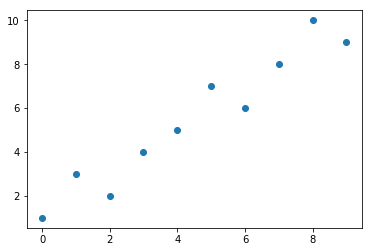

In [3]:
price = [1, 3, 2, 4, 5, 7, 6, 8, 10, 9]
plt.plot(price, 'o')

In [4]:
X = [[1], [3], [2], [4], [5], [7], [6], [8], [10]]
y = [3, 2, 4, 5, 7, 6, 8, 10, 9]

In [5]:
from sklearn import linear_model
rm = linear_model.Ridge(alpha = 0, fit_intercept = True)
rm.fit(X,y)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

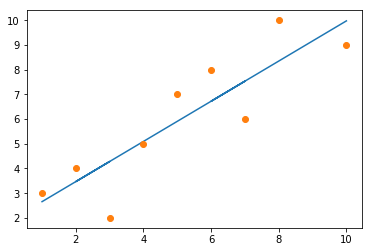

In [7]:
y_hat = rm.predict(X)
plt.plot(X, y_hat)
plt.plot(X, y, 'o')

In [8]:
print(rm.coef_)
print(rm.intercept_)

[0.813]
1.845161290322582


[0.332]
4.305263157894737


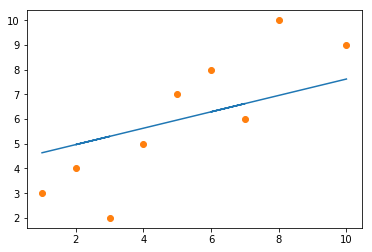

In [10]:
rm.set_params(alpha = 100)
rm.fit(X,y)
y_hat = rm.predict(X)
plt.plot(X, y_hat)
plt.plot(X, y, 'o')
print(rm.coef_)
print(rm.intercept_)

[0.006]
5.9715736040609135


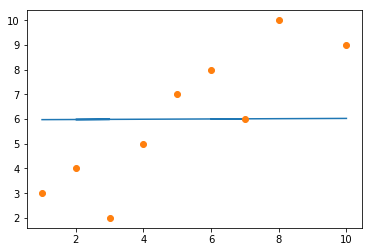

In [19]:
rm.set_params(alpha = 10000)
rm.fit(X,y)
y_hat = rm.predict(X)
plt.plot(X, y_hat)
plt.plot(X, y, 'o')
print(rm.coef_)
print(rm.intercept_)

In [20]:
pip install pandas_datareader


The following command must be run outside of the IPython shell:

    $ pip install pandas_datareader

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


C:\python\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


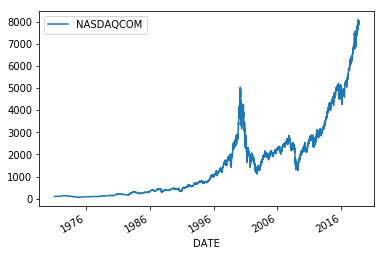

In [3]:
import datetime
import pandas_datareader.data as web
tsd = web.DataReader('NASDAQCOM', "fred", '1971/1/1', '2018/10/4').dropna()
tsd.colmns = ['close']
tsd.plot()

In [6]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import pandas_datareader.data as web
import numpy as np

In [32]:
def reshape(ts, inS, ooS):
    x = []
    y = []
    for i in range(inS, len(ts) - ooS):
        x.append(ts[i -inS:i])
        y.append(ts[i+ooS][-1])
    X = (np.array(x).reshape(len(x),inS))
    y = np.array(y)
    return X, y

def y_hat_by_Ridge(X, y, inS, alpha = 1):
    rm = linear_model.Ridge(alpha=alpha, fit_intercept= True)
    y_hat = []
    for i in range(inS + 1, len(X)):
        XX = X[:i - inS]
        yy = y[:i - inS]
        XX9 = X[i]
        rm.fit(XX, yy)
        y_hat.append(rm.predict([XX9])[0])
    return np.array(y_hat)

tsd = web.DataReader('NASDAQCOM', "fred", '1971/1/1', '2018/10/4').dropna()
ts = np.log(tsd).values.copy()

inS = 10
ooS = 1

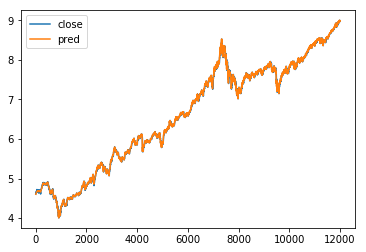

In [33]:
X, y = reshape(ts, inS, ooS)

y_hat = y_hat_by_Ridge(X, y, inS, alpha = 1)
plt.plot(y[1:], label = 'close')
plt.plot(y_hat, label = 'pred')
plt.legend()

In [35]:
print('予測誤差', mean_squared_error((y[inS+1:]), (y_hat)))

予測誤差 0.00038977444902192897


In [38]:
print('ベンチマーク' , mean_squared_error((y[ooS:]), (y[: -ooS])))

ベンチマーク 0.00014981172740027976
